In [11]:
# Basic Libraries
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load dataset
data = pd.read_csv('train.csv')  # Update the path if necessary

# Select relevant visual features and the label column
visual_features = ['bright', 'cont', 'warm', 'colorf', 'sat', 'clar']  # Adjust based on feature names in your dataset
X = data[visual_features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


Accuracy: 78.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1228
           1       0.78      0.79      0.79      1190

    accuracy                           0.79      2418
   macro avg       0.79      0.79      0.79      2418
weighted avg       0.79      0.79      0.79      2418



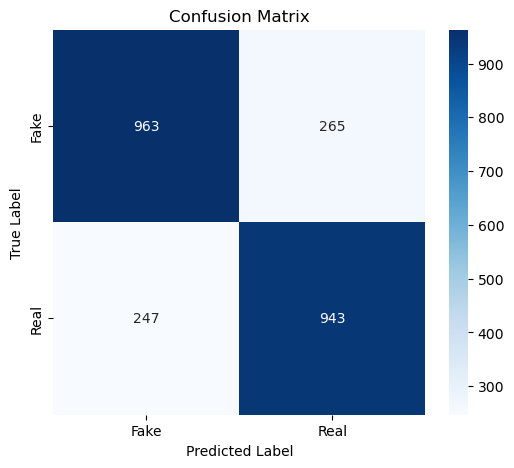

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


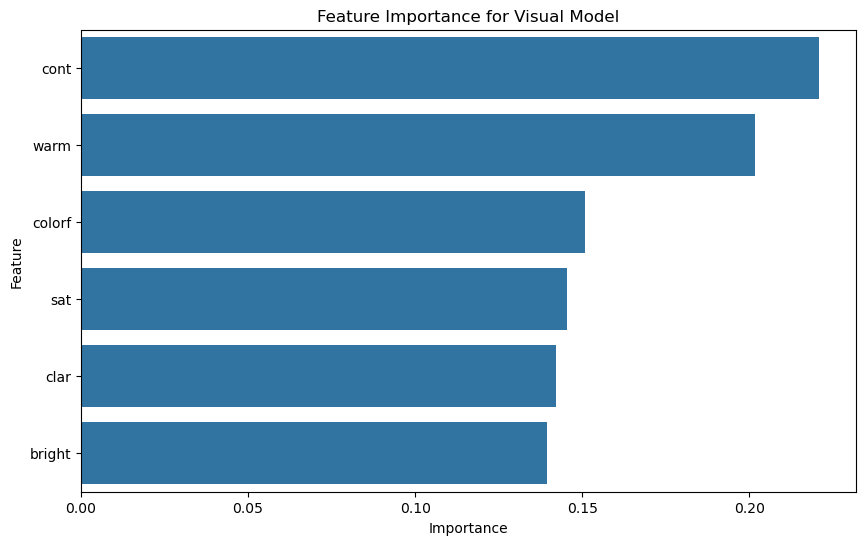

In [19]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': visual_features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importance for Visual Model")
plt.show()
